# Import Library

In [41]:
#Import semua library
import pm4py
import pandas as pd
import xml.etree.ElementTree as ET
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
#Untuk mengatur penampilan data
pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')

pd.set_option('display.max_colwidth', None)
#pd.reset_option('display.max_colwidth', None)

# Import dataset

In [2]:
# Baca data dari file CSV menggunakan pandas
csv_file_path = 'data-ticket-karyawan-cluster.csv'
data_raw = pd.read_csv(csv_file_path)
data_raw

sumber tahun bulan  issue id  tracker           created on  \
0     Lapor PPDB     2024-06     21639  Support  2024-06-29 09:09:00   
1     Lapor PPDB     2024-06     21662  Support  2024-06-29 12:51:50   
2     Lapor PPDB     2024-06     21088  Support  2024-06-22 05:30:34   
3     Lapor PPDB     2024-06     21689  Support  2024-07-01 02:28:58   
4     Lapor PPDB     2024-06     21479  Support  2024-06-26 14:13:47   
...          ...         ...       ...      ...                  ...   
2289  Lapor PPDB     2024-04     18649  Support  2024-04-02 16:24:20   
2290  Lapor PPDB     2024-04     18619  Support  2024-03-18 10:29:01   
2291  Lapor PPDB     2024-04     18354  Support  2024-01-22 11:20:45   
2292  Lapor PPDB     2024-04     18617  Support  2024-03-18 10:24:36   
2293  Lapor PPDB     2024-04     18466  Support  2024-02-28 11:50:20   

                closed on  start date    due date  \
0     2024-07-01 05:11:11  2024-06-29  2024-06-29   
1     2024-07-01 05:10:57  2024-06-29  2024-06-29   
2     2024-06-22 10:18:51  2024-06-22  2024-06-29   
3     2024-07-01 02:46:11  2024-06-30  2024-07-01   
4     2024-07-01 01:27:33  2024-06-26  2024-06-26   
...                   ...         ...         ...   
2289  2024-04-03 09:00:19  2024-04-02  2024-04-02   
2290  2024-04-03 08:06:33  2024-03-18  2024-04-01   
2291  2024-04-02 10:21:11  2024-01-22  2024-04-03   
2292  2024-04-02 10:08:42  2024-03-18  2024-03-26   
2293  2024-04-01 09:59:29  2024-02-26  2024-03-01   

                                   project  \
0                            Kota Denpasar   
1                               Prov. Bali   
2                Prov. Nusa Tenggara Timur   
3                 Kanwil Prov. DKI Jakarta   
4                            Kota Sukabumi   
...                                    ...   
2289                         Kota Bengkulu   
2290                             Kota Batu   
2291                                Bispro   
2292                             Kota Batu   
2293  Inisialisasi dan Koord. PPDB Online    

                                                subject  ... poin  \
0     [Closing Engine] Kota Denpasar 2024 - Jalur Zo...  ...  NaN   
1     [Kendala] Siswa Masih Bisa Langsung Pengajuan ...  ...  NaN   
2     [Closing Engine] Prov NTT 2024 - SMA All Jalur...  ...  NaN   
3     [DEV] Pengecekan dan Penyesuaian hasil seleksi...  ...  5.0   
4     Pengecekan File Ajuan Pendaftaran di Operator ...  ...  NaN   
...                                                 ...  ...  ...   
2289  Reset daftar Ajuan Pendaftaran Gabungan zona Demo  ...  0.5   
2290                  Override Engine Seleksi Kota Batu  ...  NaN   
2291     Dokumen SPH PPDB Online Kota Palangkaraya 2023  ...  0.5   
2292  Override Info Dari Formatter Kapasitas Jika Ya...  ...  NaN   
2293               Konfirmasi daerah 3 Kota/Kab di TR I  ...  0.5   

      id resolver          nama resolver grup resolver id creator  \
0            69.0  Febrian Hilmi Firdaus           DSO         69   
1            69.0  Febrian Hilmi Firdaus           DSO         69   
2            69.0  Febrian Hilmi Firdaus           DSO         69   
3             4.0          Azhar Mashuri           DIP          4   
4            74.0                Hayan .           DSO         74   
...           ...                    ...           ...        ...   
2289         73.0          Hamzah Hamzah           DLA         73   
2290          4.0          Azhar Mashuri           DIP          4   
2291         50.0             Bayu Hakim           DBM         50   
2292          4.0          Azhar Mashuri           DIP          4   
2293         23.0            Asep Ibnu a           DBM         39   

               nama creator ts menit         wkt resolved st lembur  \
0     Febrian Hilmi Firdaus      NaN  2024-06-29 14:30:41    Lembur   
1     Febrian Hilmi Firdaus      NaN  2024-07-01 05:10:57    Normal   
2     Febrian Hilmi Firdaus      NaN  2024-06-22 08:54:49    Normal   
3            

In [46]:
data_raw[data_raw.duplicated()]

sumber tahun bulan  issue id  tracker           created on  \
40    Lapor PPDB     2024-06     20552  Support  2024-06-13 22:55:19   
41    Lapor PPDB     2024-06     20552  Support  2024-06-13 22:55:19   
63    Lapor PPDB     2024-06     21540  Support  2024-06-27 09:19:39   
65    Lapor PPDB     2024-06     21473  Support  2024-06-26 13:51:08   
88    Lapor PPDB     2024-06     20916  Support  2024-06-20 06:37:59   
93    Lapor PPDB     2024-06     20826  Support  2024-06-18 16:46:33   
94    Lapor PPDB     2024-06     20826  Support  2024-06-18 16:46:33   
95    Lapor PPDB     2024-06     20826  Support  2024-06-18 16:46:33   
105   Lapor PPDB     2024-06     21247  Support  2024-06-23 23:38:42   
106   Lapor PPDB     2024-06     21247  Support  2024-06-23 23:38:42   
110   Lapor PPDB     2024-06     21553  Support  2024-06-27 11:19:09   
115   Lapor PPDB     2024-06     21534  Support  2024-06-27 08:32:49   
170   Lapor PPDB     2024-06     21431  Support  2024-06-26 08:05:14   
193   Lapor PPDB     2024-06     21379  Support  2024-06-25 13:15:32   
204   Lapor PPDB     2024-06     21342  Support  2024-06-25 07:52:45   
213   Lapor PPDB     2024-06     21351  Support  2024-06-25 09:01:43   
222   Lapor PPDB     2024-06     19168  Support  2024-05-18 10:56:44   
226   Lapor PPDB     2024-06     21347  Support  2024-06-25 08:32:27   
230   Lapor PPDB     2024-06     21343  Support  2024-06-25 07:56:54   
268   Lapor PPDB     2024-06     20480  Support  2024-06-13 11:16:33   
276   Lapor PPDB     2024-06     21314  Support  2024-06-24 14:49:17   
278   Lapor PPDB     2024-06     21313  Support  2024-06-24 14:47:43   
279   Lapor PPDB     2024-06     21313  Support  2024-06-24 14:47:43   
288   Lapor PPDB     2024-06     21218  Support  2024-06-23 17:47:59   
289   Lapor PPDB     2024-06     21218  Support  2024-06-23 17:47:59   
345   Lapor PPDB     2024-06     20544  Support  2024-06-13 18:07:28   
355   Lapor PPDB     2024-06     21083  Support  2024-06-21 23:33:40   
368   Lapor PPDB     2024-06     21137  Support  2024-06-22 12:54:16   
372   Lapor PPDB     2024-06     21177  Support  2024-06-22 22:48:39   
409   Lapor PPDB     2024-06     21102  Support  2024-06-22 09:14:53   
416   Lapor PPDB     2024-06     21119  Support  2024-06-22 10:23:02   
434   Lapor PPDB     2024-06     21096  Support  2024-06-22 08:46:50   
447   Lapor PPDB     2024-06     20599  Support  2024-06-14 14:49:59   
448   Lapor PPDB     2024-06     20599  Support  2024-06-14 14:49:59   
453   Lapor PPDB     2024-06     20321  Support  2024-06-11 17:11:56   
456   Lapor PPDB     2024-06     20778  Support  2024-06-18 09:26:41   
471   Lapor PPDB     2024-06     20458  Support  2024-06-13 07:45:27   
473   Lapor PPDB     2024-06     20484  Support  2024-06-13 11:51:54   
478   Lapor PPDB     2024-06     20196  Support  2024-06-10 19:09:44   
480   Lapor PPDB     2024-06     20340  Support  2024-06-11 23:11:24   
482   Lapor PPDB     2024-06     19935  Support  2024-06-06 15:36:38   
484   Lapor PPDB     2024-06     19936  Support  2024-06-06 16:01:17   
487   Lapor PPDB     2024-06     20034  Support  2024-06-08 14:57:47   
488   Lapor PPDB     2024-06     20034  Support  2024-06-08 14:57:47   
490   Lapor PPDB     2024-06     19748  Support  2024-06-03 17:16:48   
491   Lapor PPDB     2024-06     19748  Support  2024-06-03 17:16:48   
492   Lapor PPDB     2024-06     19748  Support  2024-06-03 17:16:48   
494   Lapor PPDB     2024-06     19824  Support  2024-06-04 22:15:18   
495   Lapor PPDB     2024-06     19824  Support  2024-06-04 22:15:18   
496   Lapor PPDB     2024-06     19824  Support  2024-06-04 22:15:18   
498   Lapor PPDB     2024-06     19840  Support  2024-06-05 07:15:59   
506   Lapor PPDB     2024-05     19094  Support  2024-05-16 11:47:30   
507   Lapor PPDB     2024-05     19094  Support  2024-05-16 11:47:30   
513   Lapor PPDB     2024-05     18999  Support  2024-05-11 11:28:21   
514   Lapor PPDB     2024-05     18999  Support  2

In [49]:
data_raw = data_raw.drop_duplicates(keep='first')

In [50]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2042 entries, 0 to 2293
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sumber         2042 non-null   object 
 1   tahun bulan    2042 non-null   object 
 2   issue id       2042 non-null   int64  
 3   tracker        2042 non-null   object 
 4   created on     2042 non-null   object 
 5   closed on      2042 non-null   object 
 6   start date     1636 non-null   object 
 7   due date       2042 non-null   object 
 8   project        2042 non-null   object 
 9   subject        2042 non-null   object 
 10  state          2042 non-null   object 
 11  poin           1718 non-null   float64
 12  id resolver    2042 non-null   float64
 13  nama resolver  2042 non-null   object 
 14  grup resolver  1958 non-null   object 
 15  id creator     2042 non-null   int64  
 16  nama creator   2042 non-null   object 
 17  ts menit       374 non-null    float64
 18  wkt resolved 

## Pilih Kolom

In [51]:
data = data_raw.drop(['sumber','tahun bulan','issue id','tracker','closed on','start date','due date','subject','id resolver','id creator','nama creator','ts menit','st lembur','state','poin'], axis=1)
data

created on                               project  \
0     2024-06-29 09:09:00                         Kota Denpasar   
1     2024-06-29 12:51:50                            Prov. Bali   
2     2024-06-22 05:30:34             Prov. Nusa Tenggara Timur   
3     2024-07-01 02:28:58              Kanwil Prov. DKI Jakarta   
4     2024-06-26 14:13:47                         Kota Sukabumi   
5     2024-06-30 19:56:25                           Kota Serang   
6     2024-06-28 17:30:55                   Prov. DI Yogyakarta   
7     2024-06-30 12:16:57                      Kab. Purbalingga   
8     2024-06-30 19:58:34                           Kota Serang   
9     2024-06-30 19:54:35                           Kota Serang   
10    2024-06-30 19:14:34                       Kota Balikpapan   
11    2024-06-30 19:42:03                     Prov. DKI Jakarta   
12    2024-06-03 08:32:24                  Problem Handling EOS   
13    2024-06-08 20:37:32                  Problem Handling EOS   
14    2024-06-06 15:22:22                  Problem Handling EOS   
15    2024-06-30 08:37:03              Kanwil Prov. DKI Jakarta   
16    2024-06-29 10:05:21                            Prov. Bali   
17    2024-06-17 22:52:43                         Prov. Lampung   
18    2024-06-20 19:09:44                         Prov. Lampung   
19    2024-06-21 14:10:43                         Prov. Lampung   
20    2024-06-29 10:44:50                         Prov. Lampung   
21    2024-06-29 08:28:15                        Kota Pontianak   
22    2024-06-19 21:59:31                  Problem Handling EOS   
23    2024-06-29 13:03:52                     Prov. DKI Jakarta   
24    2024-06-29 08:47:51                   Prov. DI Yogyakarta   
25    2024-06-29 12:56:43                            Prov. Bali   
26    2024-06-29 10:05:54                            Prov. Bali   
27    2024-06-29 08:46:19                        Kota Pontianak   
28    2024-06-28 08:16:35                         Kota Bengkulu   
29    2024-06-29 11:18:00                            Prov. Bali   
30    2024-06-29 11:17:45                            Prov. Bali   
31    2024-06-29 11:43:49                         Prov. Lampung   
32    2024-06-26 05:46:05                          Prov. Banten   
33    2024-06-27 16:14:02                   Prov. DI Yogyakarta   
34    2024-06-27 14:34:17                   Prov. DI Yogyakarta   
35    2024-06-27 13:26:29                   Prov. DI Yogyakarta   
36    2024-06-22 15:15:01                      Kab. Purbalingga   
37    2024-06-27 11:06:48                                Bispro   
38    2024-06-29 08:29:33                      Kab. Purbalingga   
39    2024-06-13 22:55:19                  Problem Handling EOS   
42    2024-06-29 08:15:22                           Kab. Bangka   
43    2024-06-28 15:31:19                     Prov. Jawa Tengah   
44    2024-06-28 08:55:30                         Kota Bengkulu   
45    2024-06-28 15:57:13                            Kab. Berau   
46    2024-06-28 20:24:03                           Kota Serang   
47    2024-06-28 19:38:01                           Kota Serang   
48    2024-06-27 09:22:00                     Prov. Jawa Tengah   
49    2024-06-28 14:48:34                        Kota Pontianak   
50    2024-05-28 09:38:04                                Bispro   
51    2024-06-28 20:38:52                     Prov. Jawa Tengah   
52    2024-06-26 14:37:15                                Bispro   
53    2024-06-26 14:49:59                                Bispro   
54    2024-06-26 14:44:19                                Bispro   
55    2024-06-12 15:48:36                                Bispro   
56    2024-06-16 12:13:01                  Problem Handling EOS   
57    2024-06-28 17:48:16                           Kota Serang   
58    2024-06-22 13:14:05                  Problem Handling EOS   
59    2024-06-15 19:45:36                  Problem Handling EOS   
60    2024-06-28 16:11:08                        Kota Pontiana

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2042 entries, 0 to 2293
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   created on     2042 non-null   object
 1   project        2042 non-null   object
 2   nama resolver  2042 non-null   object
 3   grup resolver  1958 non-null   object
 4   wkt resolved   2042 non-null   object
 5   cluster        2042 non-null   object
dtypes: object(6)
memory usage: 111.7+ KB


## Setting Waktu

In [53]:
#Mengubah ke datetime
data['created on'] = pd.to_datetime(data['created on'])
data['wkt resolved'] = pd.to_datetime(data['wkt resolved'])

In [54]:
data

created on                               project  \
0    2024-06-29 09:09:00                         Kota Denpasar   
1    2024-06-29 12:51:50                            Prov. Bali   
2    2024-06-22 05:30:34             Prov. Nusa Tenggara Timur   
3    2024-07-01 02:28:58              Kanwil Prov. DKI Jakarta   
4    2024-06-26 14:13:47                         Kota Sukabumi   
5    2024-06-30 19:56:25                           Kota Serang   
6    2024-06-28 17:30:55                   Prov. DI Yogyakarta   
7    2024-06-30 12:16:57                      Kab. Purbalingga   
8    2024-06-30 19:58:34                           Kota Serang   
9    2024-06-30 19:54:35                           Kota Serang   
10   2024-06-30 19:14:34                       Kota Balikpapan   
11   2024-06-30 19:42:03                     Prov. DKI Jakarta   
12   2024-06-03 08:32:24                  Problem Handling EOS   
13   2024-06-08 20:37:32                  Problem Handling EOS   
14   2024-06-06 15:22:22                  Problem Handling EOS   
15   2024-06-30 08:37:03              Kanwil Prov. DKI Jakarta   
16   2024-06-29 10:05:21                            Prov. Bali   
17   2024-06-17 22:52:43                         Prov. Lampung   
18   2024-06-20 19:09:44                         Prov. Lampung   
19   2024-06-21 14:10:43                         Prov. Lampung   
20   2024-06-29 10:44:50                         Prov. Lampung   
21   2024-06-29 08:28:15                        Kota Pontianak   
22   2024-06-19 21:59:31                  Problem Handling EOS   
23   2024-06-29 13:03:52                     Prov. DKI Jakarta   
24   2024-06-29 08:47:51                   Prov. DI Yogyakarta   
25   2024-06-29 12:56:43                            Prov. Bali   
26   2024-06-29 10:05:54                            Prov. Bali   
27   2024-06-29 08:46:19                        Kota Pontianak   
28   2024-06-28 08:16:35                         Kota Bengkulu   
29   2024-06-29 11:18:00                            Prov. Bali   
30   2024-06-29 11:17:45                            Prov. Bali   
31   2024-06-29 11:43:49                         Prov. Lampung   
32   2024-06-26 05:46:05                          Prov. Banten   
33   2024-06-27 16:14:02                   Prov. DI Yogyakarta   
34   2024-06-27 14:34:17                   Prov. DI Yogyakarta   
35   2024-06-27 13:26:29                   Prov. DI Yogyakarta   
36   2024-06-22 15:15:01                      Kab. Purbalingga   
37   2024-06-27 11:06:48                                Bispro   
38   2024-06-29 08:29:33                      Kab. Purbalingga   
39   2024-06-13 22:55:19                  Problem Handling EOS   
42   2024-06-29 08:15:22                           Kab. Bangka   
43   2024-06-28 15:31:19                     Prov. Jawa Tengah   
44   2024-06-28 08:55:30                         Kota Bengkulu   
45   2024-06-28 15:57:13                            Kab. Berau   
46   2024-06-28 20:24:03                           Kota Serang   
47   2024-06-28 19:38:01                           Kota Serang   
48   2024-06-27 09:22:00                     Prov. Jawa Tengah   
49   2024-06-28 14:48:34                        Kota Pontianak   
50   2024-05-28 09:38:04                                Bispro   
51   2024-06-28 20:38:52                     Prov. Jawa Tengah   
52   2024-06-26 14:37:15                                Bispro   
53   2024-06-26 14:49:59                                Bispro   
54   2024-06-26 14:44:19                                Bispro   
55   2024-06-12 15:48:36                                Bispro   
56   2024-06-16 12:13:01                  Problem Handling EOS   
57   2024-06-28 17:48:16                           Kota Serang   
58   2024-06-22 13:14:05                  Problem Handling EOS   
59   2024-06-15 19:45:36                  Problem Handling EOS   
60   2024-06-28 16:11:08                        Kota Pontianak   
61   2024-06-26 21:04:40                           Kot

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2042 entries, 0 to 2293
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   created on     2042 non-null   datetime64[ns]
 1   project        2042 non-null   object        
 2   nama resolver  2042 non-null   object        
 3   grup resolver  1958 non-null   object        
 4   wkt resolved   2042 non-null   datetime64[ns]
 5   cluster        2042 non-null   object        
dtypes: datetime64[ns](2), object(4)
memory usage: 111.7+ KB


# Preproces

## data kosong

In [56]:
#Mengecek data kosong
data.isna().sum()

created on        0
project           0
nama resolver     0
grup resolver    84
wkt resolved      0
cluster           0
dtype: int64

In [57]:
data['grup resolver']=data['grup resolver'].fillna('Tanpa Divisi')
data

created on                               project  \
0    2024-06-29 09:09:00                         Kota Denpasar   
1    2024-06-29 12:51:50                            Prov. Bali   
2    2024-06-22 05:30:34             Prov. Nusa Tenggara Timur   
3    2024-07-01 02:28:58              Kanwil Prov. DKI Jakarta   
4    2024-06-26 14:13:47                         Kota Sukabumi   
5    2024-06-30 19:56:25                           Kota Serang   
6    2024-06-28 17:30:55                   Prov. DI Yogyakarta   
7    2024-06-30 12:16:57                      Kab. Purbalingga   
8    2024-06-30 19:58:34                           Kota Serang   
9    2024-06-30 19:54:35                           Kota Serang   
10   2024-06-30 19:14:34                       Kota Balikpapan   
11   2024-06-30 19:42:03                     Prov. DKI Jakarta   
12   2024-06-03 08:32:24                  Problem Handling EOS   
13   2024-06-08 20:37:32                  Problem Handling EOS   
14   2024-06-06 15:22:22                  Problem Handling EOS   
15   2024-06-30 08:37:03              Kanwil Prov. DKI Jakarta   
16   2024-06-29 10:05:21                            Prov. Bali   
17   2024-06-17 22:52:43                         Prov. Lampung   
18   2024-06-20 19:09:44                         Prov. Lampung   
19   2024-06-21 14:10:43                         Prov. Lampung   
20   2024-06-29 10:44:50                         Prov. Lampung   
21   2024-06-29 08:28:15                        Kota Pontianak   
22   2024-06-19 21:59:31                  Problem Handling EOS   
23   2024-06-29 13:03:52                     Prov. DKI Jakarta   
24   2024-06-29 08:47:51                   Prov. DI Yogyakarta   
25   2024-06-29 12:56:43                            Prov. Bali   
26   2024-06-29 10:05:54                            Prov. Bali   
27   2024-06-29 08:46:19                        Kota Pontianak   
28   2024-06-28 08:16:35                         Kota Bengkulu   
29   2024-06-29 11:18:00                            Prov. Bali   
30   2024-06-29 11:17:45                            Prov. Bali   
31   2024-06-29 11:43:49                         Prov. Lampung   
32   2024-06-26 05:46:05                          Prov. Banten   
33   2024-06-27 16:14:02                   Prov. DI Yogyakarta   
34   2024-06-27 14:34:17                   Prov. DI Yogyakarta   
35   2024-06-27 13:26:29                   Prov. DI Yogyakarta   
36   2024-06-22 15:15:01                      Kab. Purbalingga   
37   2024-06-27 11:06:48                                Bispro   
38   2024-06-29 08:29:33                      Kab. Purbalingga   
39   2024-06-13 22:55:19                  Problem Handling EOS   
42   2024-06-29 08:15:22                           Kab. Bangka   
43   2024-06-28 15:31:19                     Prov. Jawa Tengah   
44   2024-06-28 08:55:30                         Kota Bengkulu   
45   2024-06-28 15:57:13                            Kab. Berau   
46   2024-06-28 20:24:03                           Kota Serang   
47   2024-06-28 19:38:01                           Kota Serang   
48   2024-06-27 09:22:00                     Prov. Jawa Tengah   
49   2024-06-28 14:48:34                        Kota Pontianak   
50   2024-05-28 09:38:04                                Bispro   
51   2024-06-28 20:38:52                     Prov. Jawa Tengah   
52   2024-06-26 14:37:15                                Bispro   
53   2024-06-26 14:49:59                                Bispro   
54   2024-06-26 14:44:19                                Bispro   
55   2024-06-12 15:48:36                                Bispro   
56   2024-06-16 12:13:01                  Problem Handling EOS   
57   2024-06-28 17:48:16                           Kota Serang   
58   2024-06-22 13:14:05                  Problem Handling EOS   
59   2024-06-15 19:45:36                  Problem Handling EOS   
60   2024-06-28 16:11:08                        Kota Pontianak   
61   2024-06-26 21:04:40                           Kot

## data unique

In [58]:
data.nunique()

created on       2035
project            56
nama resolver      46
grup resolver       8
wkt resolved     2036
cluster            13
dtype: int64

# visualisasi data

## Project

In [60]:
data['project'].value_counts()

project
Prov. Jawa Tengah                       213
Bispro                                  196
Prov. DKI Jakarta                       142
Prov. DI Yogyakarta                     106
SIAP PPDB                               103
Prov. Banten                             75
Kota Yogyakarta                          73
Problem Handling EOS                     72
Prov. Bali                               67
Prov. Jambi                              62
Kab. Bantul                              45
Kab. Batang                              45
Kanwil Prov. DKI Jakarta                 42
Prov. Kalimantan Tengah                  39
Cabdin Kota Samarinda                    38
Kota Pontianak                           36
Cabdin Kota Balikpapan                   30
Kota Palangkaraya                        29
Kota Batu                                27
Kab. Pati                                27
Kab. Kulon Progo                         26
Kab. Klaten                              26
Kab. Gresik             

/var/folders/m8/_0cj2g7567gfmpcm4lg826wh0000gn/T/ipykernel_3231/2448304213.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='project', data=data, palette="viridis")


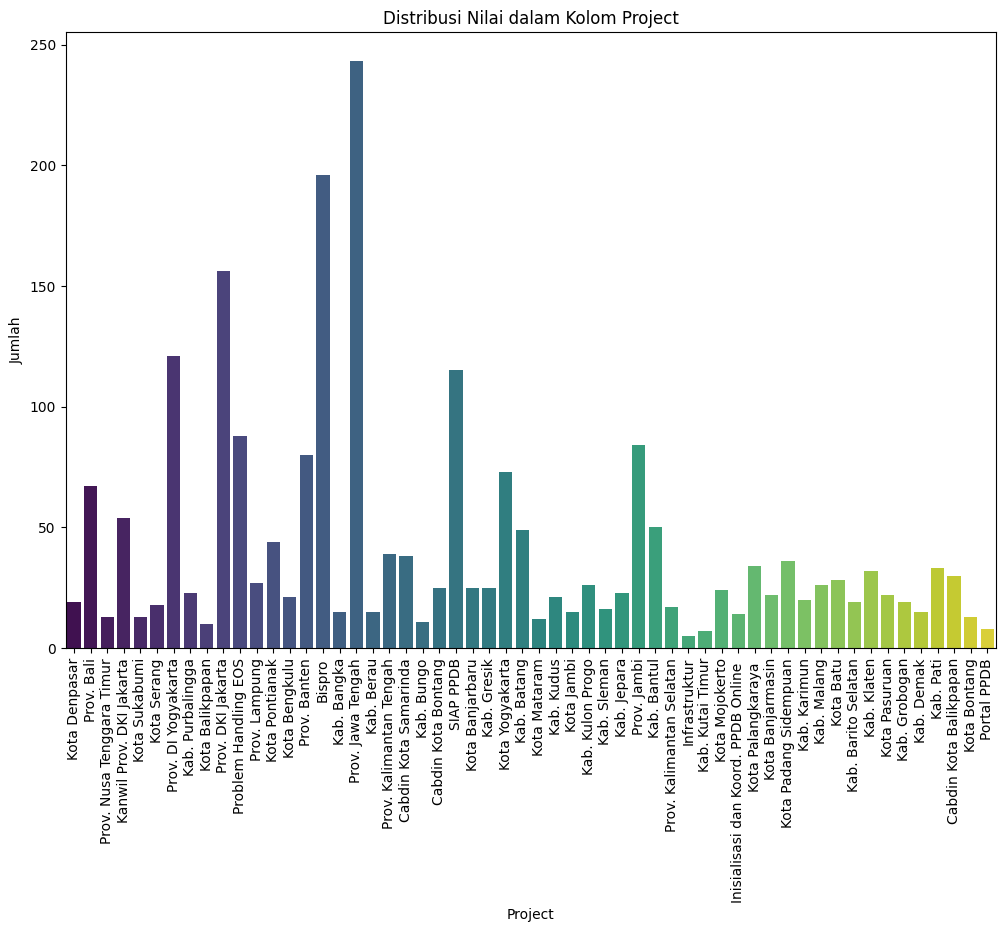

In [40]:
plt.figure(figsize=(12,8))
sns.countplot(x='project', data=data, palette="viridis")
plt.xlabel('Project')
plt.ylabel('Jumlah')
plt.title('Distribusi Nilai dalam Kolom Project')
plt.xticks(rotation=90)  # Memutar label sumbu x jika perlu
plt.show()

## Nama resolver

In [42]:
data['nama resolver'].value_counts()

nama resolver
Azhar Mashuri                           234
Kukuh Ari Susanto                       198
Hamzah Hamzah                           185
ahmad nashruddin                        182
Rizky Adi Prasetyo                      148
Ghazi Muwaffaq                          126
Kukuh Rahmadani                         106
Badrul  Munir                            94
Rahman rahman                            89
Achmad Fauzi                             84
Sandrian Yulian Firmansyah Noorihsan     74
Febrian Hilmi Firdaus                    71
Mochamad Aldino Beta Giosanfi            66
Rifki Ainul Riza                         65
Villa Nanda                              64
Mochamad Rifai                           52
Muhammad Irfan                           51
Hayan .                                  51
Aseanti Kirana                           37
Danang Wahyu                             30
Fahmiko Purnama Putra                    28
Tsany Afif                               28
Sugeng Suprayogi  

/var/folders/m8/_0cj2g7567gfmpcm4lg826wh0000gn/T/ipykernel_3231/3582965161.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='nama resolver', data=data, palette="viridis")


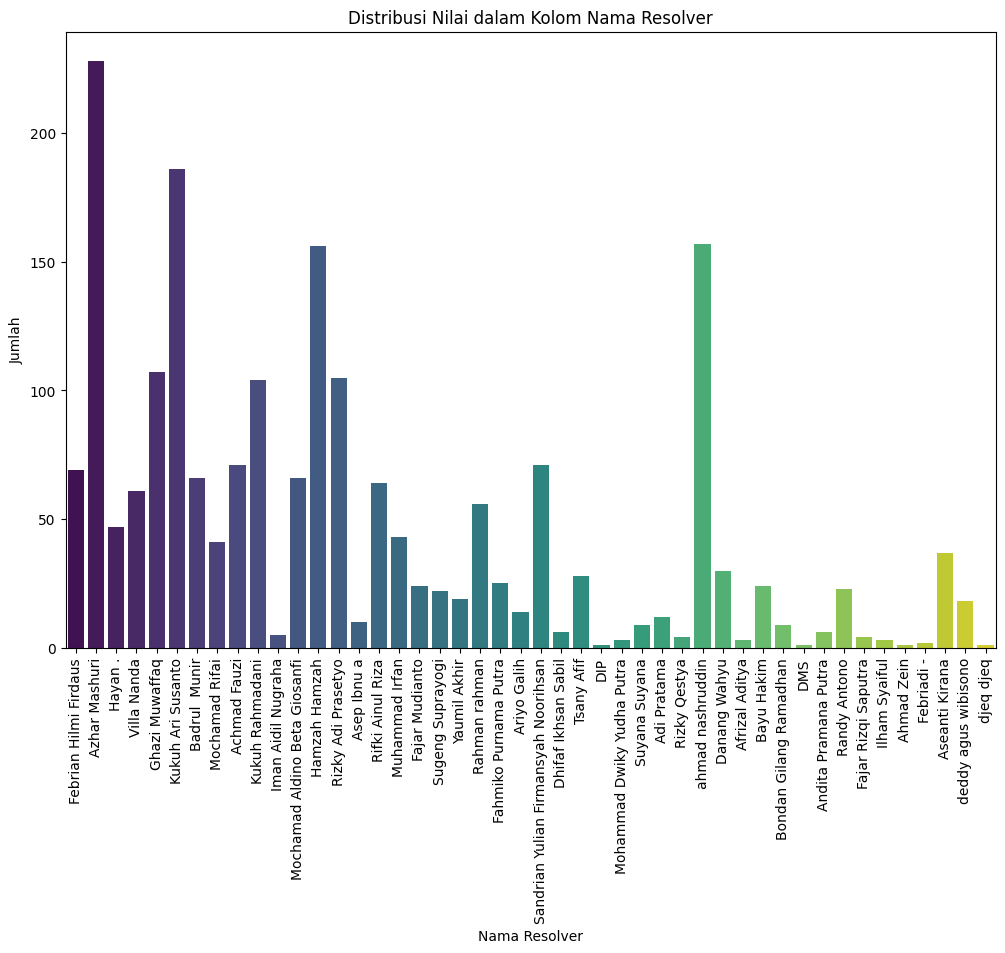

In [61]:
plt.figure(figsize=(12,8))
sns.countplot(x='nama resolver', data=data, palette="viridis")
plt.xlabel('Nama Resolver')
plt.ylabel('Jumlah')
plt.title('Distribusi Nilai dalam Kolom Nama Resolver')
plt.xticks(rotation=90)  # Memutar label sumbu x jika perlu
plt.show()

## grup resolver

In [62]:
data['grup resolver'].value_counts()

grup resolver
DIP             642
DSO             639
DLA             354
DMS             137
DBM             128
Tanpa Divisi     84
DAK,DBM          55
DAK               3
Name: count, dtype: int64

/var/folders/m8/_0cj2g7567gfmpcm4lg826wh0000gn/T/ipykernel_3231/338335330.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='grup resolver', data=data, palette="viridis")


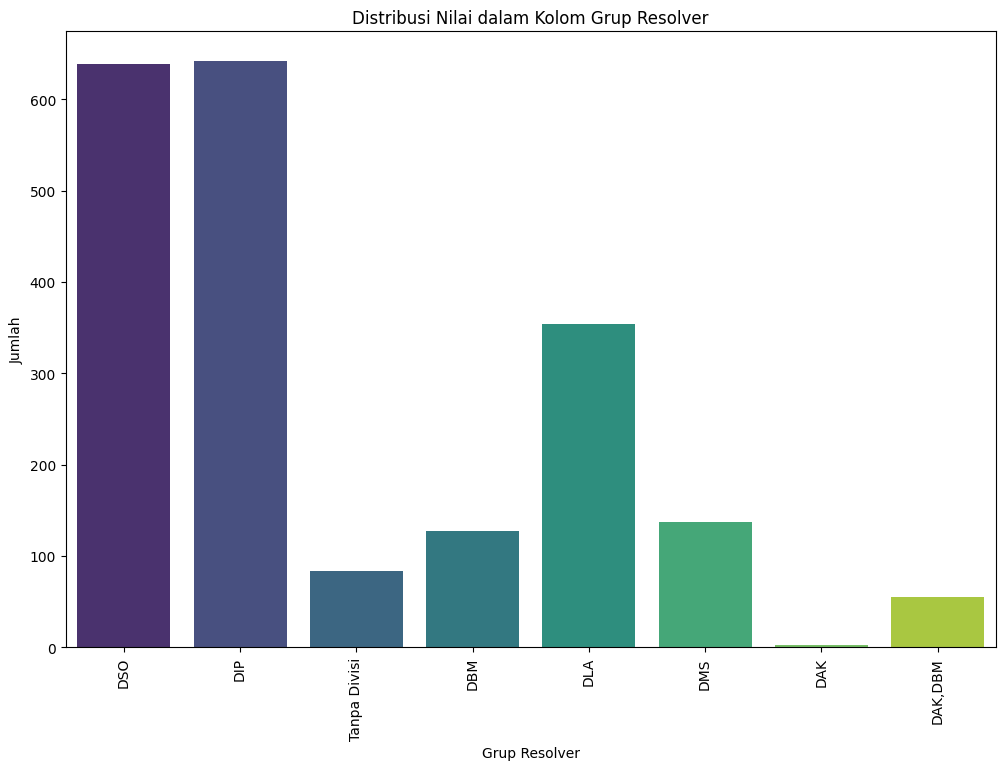

In [63]:
plt.figure(figsize=(12,8))
sns.countplot(x='grup resolver', data=data, palette="viridis")
plt.xlabel('Grup Resolver')
plt.ylabel('Jumlah')
plt.title('Distribusi Nilai dalam Kolom Grup Resolver')
plt.xticks(rotation=90)  # Memutar label sumbu x jika perlu
plt.show()

## cluster

In [64]:
data['cluster'].value_counts()

cluster
Pengaturan Pendaftaran               529
Migrasi Data                         280
Administrasi                         217
Konfigurasi                          209
Deploy Real                          164
Pengaturan Pendataan                 143
Up Situs Publik                      129
Override                             101
Pengaturan Hak Akses dan Operator     77
Pengaturan Jalur                      73
Pengaturan Situs Demo                 47
Closing Engine                        38
Pengaturan Banner/Logo                35
Name: count, dtype: int64

/var/folders/m8/_0cj2g7567gfmpcm4lg826wh0000gn/T/ipykernel_3231/635145525.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=data, palette="viridis")


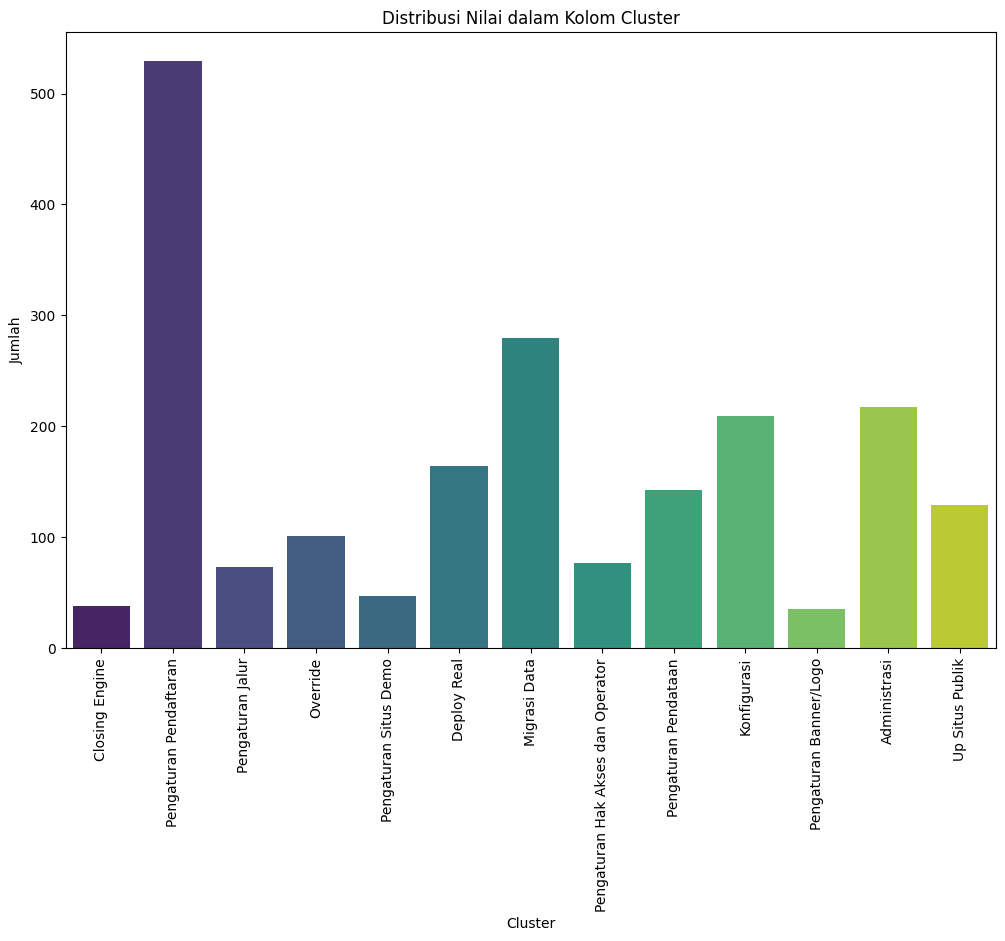

In [65]:
plt.figure(figsize=(12,8))
sns.countplot(x='cluster', data=data, palette="viridis")
plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.title('Distribusi Nilai dalam Kolom Cluster')
plt.xticks(rotation=90)  # Memutar label sumbu x jika perlu
plt.show()

# Process Mining

In [71]:
event_log = pm4py.format_dataframe(data, case_id='project',
                                           activity_key='cluster', timestamp_key='wkt resolved')
event_log

created on                               project  \
0    2022-05-12 16:01:21+00:00                                Bispro   
1    2023-04-06 12:22:26+00:00                                Bispro   
2    2023-06-14 14:25:19+00:00                                Bispro   
3    2023-08-09 13:13:51+00:00                                Bispro   
4    2023-07-27 09:39:50+00:00                                Bispro   
5    2023-08-09 13:20:42+00:00                                Bispro   
6    2023-10-25 10:33:58+00:00                                Bispro   
7    2023-11-06 08:07:28+00:00                                Bispro   
8    2023-11-13 10:37:48+00:00                                Bispro   
9    2023-11-02 11:47:52+00:00                                Bispro   
10   2023-08-09 13:19:35+00:00                                Bispro   
11   2023-11-15 16:41:10+00:00                                Bispro   
12   2023-11-21 11:12:36+00:00                                Bispro   
13   2023-11-23 16:07:17+00:00                                Bispro   
14   2024-01-17 13:12:26+00:00                                Bispro   
15   2024-01-22 11:20:45+00:00                                Bispro   
16   2024-01-30 07:56:12+00:00                                Bispro   
17   2024-02-06 17:08:43+00:00                                Bispro   
18   2024-02-02 11:51:51+00:00                                Bispro   
19   2024-02-19 10:15:29+00:00                                Bispro   
20   2024-02-27 15:59:57+00:00                                Bispro   
21   2024-02-28 12:07:58+00:00                                Bispro   
22   2024-02-28 11:42:15+00:00                                Bispro   
23   2024-02-23 15:02:59+00:00                                Bispro   
24   2024-02-29 11:24:56+00:00                                Bispro   
25   2024-03-14 12:27:24+00:00                                Bispro   
26   2024-03-14 12:29:31+00:00                                Bispro   
27   2024-03-14 15:24:04+00:00                                Bispro   
28   2024-03-07 11:42:43+00:00                                Bispro   
29   2024-03-07 11:43:59+00:00                                Bispro   
30   2024-03-07 11:46:49+00:00                                Bispro   
31   2024-03-07 11:49:58+00:00                                Bispro   
32   2024-03-07 11:50:52+00:00                                Bispro   
33   2024-03-07 11:52:55+00:00                                Bispro   
34   2024-03-07 11:55:07+00:00                                Bispro   
35   2024-03-07 11:56:18+00:00                                Bispro   
36   2024-03-07 11:57:10+00:00                                Bispro   
37   2024-03-07 11:58:29+00:00                                Bispro   
38   2024-03-07 11:59:23+00:00                                Bispro   
39   2024-03-07 12:01:45+00:00                                Bispro   
40   2024-03-07 12:02:27+00:00                                Bispro   
41   2024-03-07 12:06:09+00:00                                Bispro   
42   2024-03-07 12:04:57+00:00                                Bispro   
43   2024-03-07 13:13:34+00:00                                Bispro   
44   2024-03-07 13:14:31+00:00                                Bispro   
45   2024-03-07 13:16:28+00:00                                Bispro   
46   2024-03-07 13:17:16+00:00                                Bispro   
47   2024-03-07 13:20:19+00:00                                Bispro   
48   2024-03-07 13:21:39+00:00                                Bispro   
49   2024-03-07 13:22:58+00:00                                Bispro   
50   2024-03-07 13:24:11+00:00                                Bispro   
51   2024-03-07 13:24:54+00:00                                Bispro   
52   2024-03-07 13:31:46+00:00                                Bispro   
53   2024-03-07 13:33:43+00:00                                Bispro   
54   2024-03-07 13:42:39+00:00                              

In [72]:
event_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   created on         2042 non-null   datetime64[ns, UTC]
 1   project            2042 non-null   object             
 2   nama resolver      2042 non-null   object             
 3   grup resolver      2042 non-null   object             
 4   wkt resolved       2042 non-null   datetime64[ns, UTC]
 5   cluster            2042 non-null   object             
 6   case:concept:name  2042 non-null   string             
 7   concept:name       2042 non-null   string             
 8   time:timestamp     2042 non-null   datetime64[ns, UTC]
 9   @@index            2042 non-null   int64              
 10  @@case_index       2042 non-null   int64              
dtypes: datetime64[ns, UTC](3), int64(2), object(4), string(2)
memory usage: 175.6+ KB


In [73]:
def start_end_xes(file_path):
    start_activities = pm4py.get_start_activities(file_path)
    end_activities = pm4py.get_end_activities(file_path)
    print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

start_end_xes(event_log)

Start activities: {'Administrasi': 3, 'Pengaturan Hak Akses dan Operator': 8, 'Closing Engine': 5, 'Pengaturan Pendataan': 3, 'Up Situs Publik': 7, 'Pengaturan Situs Demo': 9, 'Migrasi Data': 7, 'Pengaturan Pendaftaran': 5, 'Override': 5, 'Konfigurasi': 2, 'Pengaturan Jalur': 1, 'Deploy Real': 1}
End activities: {'Administrasi': 2, 'Konfigurasi': 4, 'Pengaturan Pendaftaran': 17, 'Migrasi Data': 8, 'Closing Engine': 13, 'Deploy Real': 2, 'Pengaturan Pendataan': 3, 'Pengaturan Jalur': 2, 'Pengaturan Situs Demo': 2, 'Pengaturan Banner/Logo': 1, 'Override': 1, 'Pengaturan Hak Akses dan Operator': 1}


# Process Discovery

In [74]:
import graphviz
import pydot

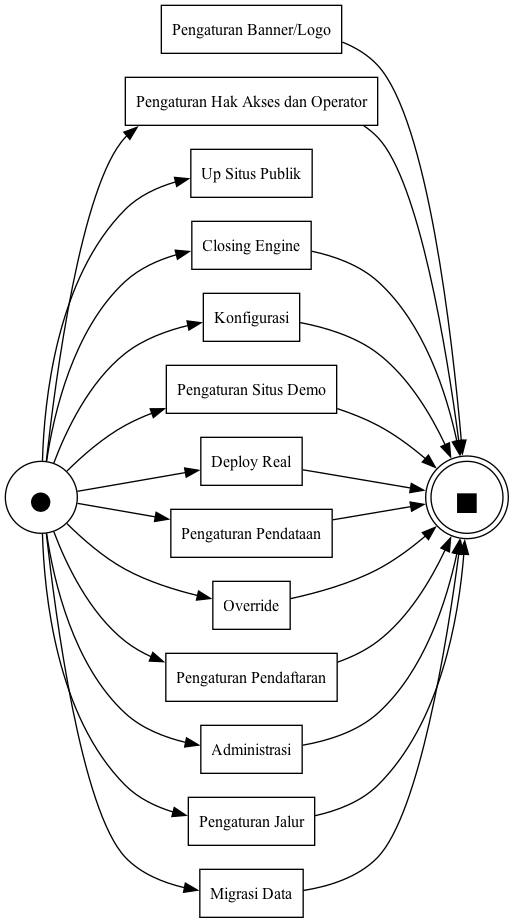

In [81]:
net_alpha, initial_marking, final_marking = pm4py.discover_petri_net_alpha(event_log)
pm4py.view_petri_net(net_alpha, initial_marking, final_marking)